In [ ]:
#Import data


import pandas as pd
from io import StringIO

data = """
status	sex	tx	base	low	high
u	f	All	0.388	0.37232	0.40368
m	f	All	0.308	0.28644	0.32956
u	m	All	0.399	0.3892	0.4088
m	m	All	0.299	0.2892	0.3088
u	f	Surgery	0.135	0.1154	0.1546
m	f	Surgery	0.103	0.08536	0.12064
u	m	Surgery	0.122	0.11024	0.13376
m	m	Surgery	0.096	0.08816	0.10384
u	f	LN removed	0.147	0.12152	0.17248
m	f	LN removed	0.104	0.08244	0.12556
u	m	LN removed	0.132	0.11828	0.14572
m	m	LN removed	0.113	0.1032	0.1228
u	f	Chemotherapy	0.265	0.2454	0.2846
m	f	Chemotherapy	0.215	0.1954	0.2346
u	m	Chemotherapy	0.291	0.2812	0.3008
m	m	Chemotherapy	0.218	0.21016	0.22584
u	f	Radiation	0.264	0.24832	0.27968
m	f	Radiation	0.22	0.20432	0.23568
u	m	Radiation	0.292	0.2822	0.3018
m	m	Radiation	0.21	0.20412	0.21588
u	f	Surgery not reccomended	0.434	0.4144	0.4536
m	f	Surgery not reccomended	0.341	0.31748	0.36452
u	m	Surgery not reccomended	0.435	0.42324	0.44676
m	m	Surgery not reccomended	0.321	0.3112	0.3308
u	f	Post-Op Radiation	0.12	0.10236	0.13764
m	f	Post-Op Radiation	0.087	0.07132	0.10268
u	m	Post-Op Radiation	0.121	0.1112	0.1308
m	m	Post-Op Radiation	0.099	0.09116	0.10684
u	f	Systemic	0.124	0.09068	0.15732
m	f	Systemic	0.046	0.02248	0.06952
u	m	Systemic	0.103	0.08536	0.12064
m	m	Systemic	0.095	0.08324	0.10676
"""

# Use StringIO to convert the string data into a file-like object
data = StringIO(data)

# Read the data into a pandas DataFrame
df = pd.read_csv(data, sep='\t')
print(df.head())

  status sex       tx   base      low     high
0      u   f      All  0.388  0.37232  0.40368
1      m   f      All  0.308  0.28644  0.32956
2      u   m      All  0.399  0.38920  0.40880
3      m   m      All  0.299  0.28920  0.30880
4      u   f  Surgery  0.135  0.11540  0.15460


In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Mapping values for status and sex
status_mapping = {'u': 'Unmarried', 'm': 'Married'}
sex_mapping = {'f': 'Female', 'm': 'Male'}

# Replace values based on mappings
df['status'] = df['status'].map(status_mapping)
df['sex'] = df['sex'].map(sex_mapping)

# Concatenate status and sex into a new column called 'group'
df['group'] = df['status'] + ' ' + df['sex']

# Display the updated DataFrame
print(df)


       status     sex                       tx   base      low     high  \
0   Unmarried  Female                      All  0.388  0.37232  0.40368   
1     Married  Female                      All  0.308  0.28644  0.32956   
2   Unmarried    Male                      All  0.399  0.38920  0.40880   
3     Married    Male                      All  0.299  0.28920  0.30880   
4   Unmarried  Female                  Surgery  0.135  0.11540  0.15460   
5     Married  Female                  Surgery  0.103  0.08536  0.12064   
6   Unmarried    Male                  Surgery  0.122  0.11024  0.13376   
7     Married    Male                  Surgery  0.096  0.08816  0.10384   
8   Unmarried  Female               LN removed  0.147  0.12152  0.17248   
9     Married  Female               LN removed  0.104  0.08244  0.12556   
10  Unmarried    Male               LN removed  0.132  0.11828  0.14572   
11    Married    Male               LN removed  0.113  0.10320  0.12280   
12  Unmarried  Female    

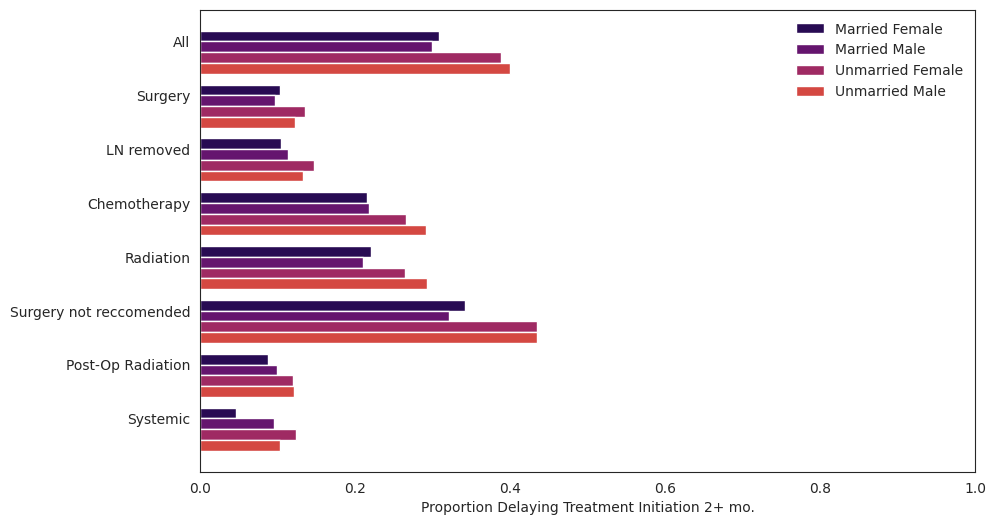

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_palette("inferno")

# Set figure size
plt.figure(figsize=(10, 6))

# Define width for each bar
bar_width = 0.2

# Get unique categories in 'tx' column
categories = df['tx'].unique()

# Calculate the index for the bars
indices = np.arange(len(categories))

# Plot bar chart for each group
for i, (group_name, group_data) in enumerate(df.groupby('group')):
    plt.barh(indices + i * bar_width, group_data['base'], height=bar_width, label=group_name)

# Set labels and title
plt.xlabel('Proportion Delaying Treatment Initiation 2+ mo.')
plt.ylabel('')
plt.title('')
plt.xlim(0, 1)

# Set ticks for y-axis
plt.yticks(indices + bar_width / 2, categories)

# Reverse the y-axis
plt.gca().invert_yaxis()

# Show legend
plt.legend(frameon=False)

# Show plot
plt.show()
